# Introduction to matplotlib

## Overview:
- **Teaching:** 10 min
- **Exercises:** 20 min

**Questions**
* What is matplotlib?
* Why should I use it?

**Objectives**
* See how to quickly plot numerical data.
* See how data is plotted from a data frame.
* Use the `plot`, `bar` and `scatter` functions to produce different plots.

Plotting data in NumPy and pandas is handled by an external Python module called *matplotlib*. Like NumPy and pandas it is a large library and has been around for a while (first released in 2003). Hence we won't cover all its functionality in this lesson.

To see the wide range of possibilities you have with matplotlib see [matplotlib example gallery](http://matplotlib.org/gallery.html), [Nicolas P. Rougier's tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/#other-types-of-plots) and [Ben Root's tutorial](http://nbviewer.jupyter.org/github/matplotlib/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part2-Plotting_Methods_Overview.ipynb) after the course.

Here we will cover the basic uses of it and how it integrates with NumPy and pandas. While working through these examples you may want to refer to the [matplotlib documentation](http://matplotlib.org/api/pyplot_api.html).

## Plotting using NumPy and matplotlib

The most common interface to matplotlib is its `pyplot` module which provides a way to affect the current state of matplotlib directly. As with both NumPy and pandas, there is a conventional way to import matplot lib, which is as follows:

In [1]:
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

It's very useful to be able to quickly plot any data we have in front of us. As we will see on the next page, matplotlib's power comes from its configurability.

## Information: Plotting in notebooks
You may have noticed the line
```python
%config InlineBackend.figure_format = 'svg'
```
and wondered what it did. This line just tweaks Jupyter notebook's internal configuration, setting the figure format to be SVG, to make the plots that we generate look a little bit nicer. We recommend you also include this line, but feel free to experiment without it, or with other values.

You may recall that in the "Introduction to Python" course, we met the sinc function. NumPy has its own implementation of the sinc function, which for those interested is defined as:
$$
\text{sinc}(x):=
\begin{cases}
\frac{\sin(\pi x)}{\pi x} &\text{ if } x\neq{0}\\
1 & \text{ if } x = 0
\end{cases}
$$
This function often crops up in signal processing applications.

Beyond the abstract mathematical definition, we can use what we have learnt in Python to find out more about sinc.

First we pick 1001 points on the x-axis between -5 and 5 using the `linspace` function. Then we can evaluate the `sinc` function at all 1001 points (recall that we can perform bulk operations on NumPy arrays).

In [2]:
x = np.linspace(-5, 5, 1000)
# sinc(x) is defined to be sin(pi*x)/(pi*x) in numpy
y_sinc = np.sinc(x)

Now `x` contains an array of x-coordinates and `y_sinc` contains an array of y-coordinates. We can plot y against x by calling matplotlib's `plot` function:

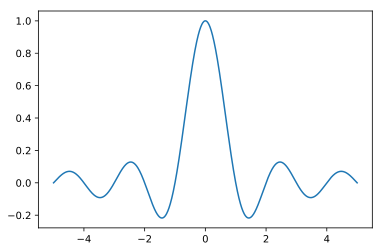

In [3]:
plt.plot(x, y_sinc)

You can see that it has plotted the sinc function between -5 and +5.

## Information: matplotlib in notebooks
Due to the nature of notebooks, you can see `[<matplotlib.lines.Line2D at 0x000000000000>]` before the plot figure. Really here we should have called `plot.show()` to produce the plot, which is what we do in later examples. The interplay between notebooks and their content can be complex, but if you follow the guidlines here, you should at least be able to reporduce what you see.

If you have ever drawn a graph before, you can probably remember someone shouting:

"But you haven't labelled your axes! And there's no title!"

We will go over this functionality now. Note that any functions called on the `plt` object will affect the state of the matplotlib plot from that point on in the script, until the `show` method is called.

Firstly, we can add some additional information to the line that we plot, by passing the keyword argument `label` with a string that describes the line that is being drawn. Next, we call the `title` function to set a title for the plot. The `legend` function then causes the label that we set first to be displayed, by default, matplotlib will try and find the best position for the legend. Finally, calling the `show` function displays the plot so we can see it.

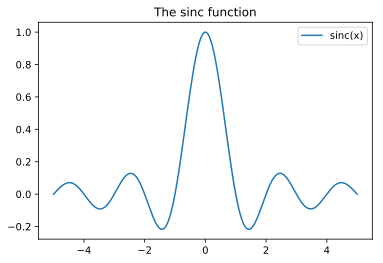

In [4]:
plt.plot(x, y_sinc, label='sinc(x)')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend()
plt.show()

Looking at our new plot, it seems better, but we have still not labelled our axes. We can do this by calling `xlabel` and `ylabel` to set the x and y labels respectively. We can also change the location of the legend if we didn't like the position that matplotlib chose for us, using the `loc` keyword argument.

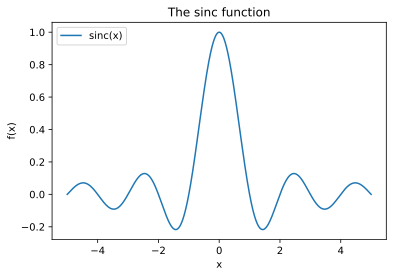

In [5]:
plt.plot(x, y_sinc, label='sinc(x)')

# Set title and legend, then show plot
plt.title('The sinc function')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

The resultant graph is now suitable for use as a diagram or in a paper. We can customise it further as we will see in the next part, but for now we will look at some other plots.

## Exercise: Another function
Another interesting class of functions, sometimes used in machine learning applications is the sigmoid class of functions. The hyberbolic tangent function is an example of a sigmoid function and `np.tanh` can be used to calculate its value. Following the steps above plot a graph of the hyperbolic tangent function. Dont forget to label your axes!

[Solution]()

## Solution+: Another function

The following code produces the plot:

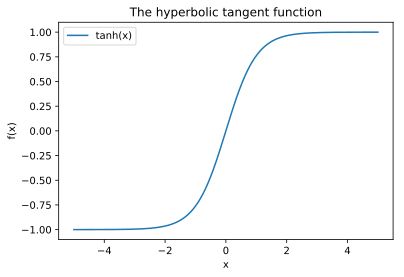

In [6]:
x = np.linspace(-5,5,1000)
y_tanh = np.tanh(x)

plt.plot(x, y_tanh, label='tanh(x)')

# Set title and legend, then show plot
plt.title('The hyperbolic tangent function')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

:+solution

## Plotting using pandas and matplotlib

First we import pandas in the same way as we did previously.

In [7]:
import pandas as pd
from pandas import Series, DataFrame

Some matplotlib functionality is provided directly through pandas (such as the `plot()` method as we saw above) but for extra functionality you need to import the matplotlib interface itself as well (but we already did that above).

We first need to import some data to plot. Let's start with the data from the end of the pandas section (available from [cetml1659on.dat](../data/cetml1659on.dat)) and import it into a `DataFrame`. This is also the solution to the last exercise in the previous section.

In [8]:
csv_file = '../data/cetml1659on.dat'
df = pd.read_csv(csv_file, # file name
                 skiprows=6,  # skip header
                 sep='\s+',  # whitespace separated
                 na_values=['-99.9', '-99.99']  # NaNs
                )
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63


Pandas integrates matplotlib directly into itself so any dataframe can be plotted easily simply by calling the `plot()` method on one of the columns. This creates a plot object which you can then edit and alter, for example by setting the axis labels using the `plt.ylabel()` function before displaying it with `plt.show()`.

As above, matplotlib operates on a single global state and calling any function on `plt` will alter that state. Calling `df.plot()` sets the *currently operating* plot. `plt.ylabel()` then alters that state and `plt.show()` displays it.

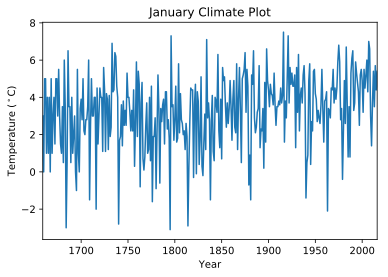

In [9]:
df['JAN'].plot()

plt.title('January Climate Plot')
plt.xlabel('Year')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Exercise: Summer climate
* Try reproducing the plot above but for the month of June.
* Try putting in two `plot()` calls with different months (both January and June for example) before calling `show()`.
* Add a legend to distinguish the two lines.

## Solution+: Summer climate
The following commented code addresses all the points of the exercise

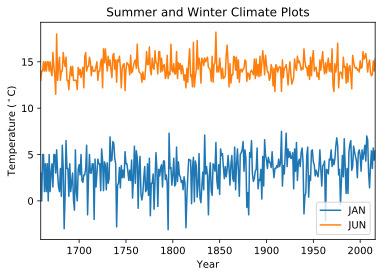

In [10]:
# Import the data 
csv_file = '../data/cetml1659on.dat'
df = pd.read_csv(csv_file, # file name
                 skiprows=6,  # skip header
                 sep='\s+',  # whitespace separated
                 na_values=['-99.9', '-99.99']  # NaNs
                )

# Plot the January and June values
df['JAN'].plot()
df['JUN'].plot()

# Add a title and axes labels
plt.title('Summer and Winter Climate Plots')
plt.xlabel('Year')
plt.ylabel('Temperature ($^\circ$C)')

# Add a legend
plt.legend()

plt.show()

:+solution

## Bar charts

Matplotlib can plot more than just line graphs, another plot type is a bar chart. We will construct a bar chart of the average temperature per decade.

We start by adding a new column to the data frame which represents the decade. We create it by taking the index (which is a list of years), converting each element to a string and then replacing the fourth character with a `'0'`.

In [11]:
years = Series(df.index, index=df.index).apply(str)
decade = years.apply(lambda x: x[:3]+'0')

df['decade'] = decade
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,decade
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87,1650
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10,1660
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78,1660
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52,1660
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63,1660


## Information+: Lambda functions
You may be wondering how

In [12]:
lambda x: x[:3]+'0'

<function __main__.<lambda>(x)>

replaces the fourth character with a `'0'`. This is through the use of Python lambda functions, which are documented [here](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions). In this case using a lambda function is a quick way of succinctly writing a function (with no name) in one line. The following is an equivalent, but longer way of doing the same thing:

In [13]:
def year2decade(year):
    '''Takes a year as a string and returns the decade, also as a string
    '''
    decade = year[:3] + '0'
    return decade

decade = years.apply(year2decade)

:+information

Once we have our decade column, we can use pandas `groupby()` function to gather our data by decade and then aggregate it by taking the mean of each decade.

In [14]:
by_decade = df.groupby('decade')
agg = by_decade.aggregate(np.mean)

agg.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
decade,,,,,,,,,,,,,
1650,3.00,4.00,6.00,7.00,11.00,13.00,16.00,16.00,13.00,10.00,5.00,2.00,8.870
1660,2.60,4.00,5.10,7.70,10.60,14.50,16.00,15.70,13.30,10.00,6.30,3.80,9.157
1670,3.25,2.35,4.50,7.25,11.05,14.40,15.80,15.25,12.40,8.95,5.20,2.45,8.607
1680,2.50,2.80,4.80,7.40,11.45,14.00,15.45,14.90,12.70,9.55,5.45,4.05,8.785
1690,1.89,2.49,3.99,6.79,9.60,13.44,15.27,14.65,11.93,8.64,5.26,3.31,8.134


At this point, `agg` is a standard pandas `DataFrame` so we can plot it like any other, by putting `.bar` after the `plot` call:

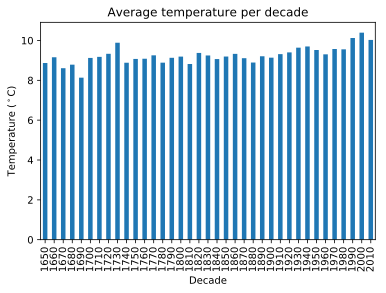

In [15]:
agg.YEAR.plot.bar()

plt.title('Average temperature per decade')
plt.xlabel('Decade')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

## Exercise: Other graphs

1. Modify the above code to plot a bar chart of the average temperature per *century*.

2. Plot a *histogram* of the average annual temperature. Make sure that the x-axis is labelled correctly.
Hint: Look in the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the right command to run.
 
3. Plot a scatter plot of each year's February temperature plotted against that year's January temperature. Is there an obvious correlation?

[Solution]()

## Solution+: Other graphs
1.Code for a bar chart of average temperature per century:

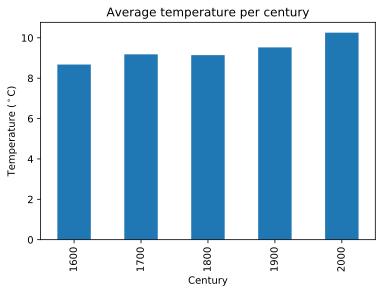

In [16]:
# Import the data file
csv_file = '../data/cetml1659on.dat'
df = pd.read_csv(csv_file, # file name
                 skiprows=6,  # skip header
                 sep='\s+',  # whitespace separated
                 na_values=['-99.9', '-99.99']  # NaNs
                )

# Add century column
years = Series(df.index, index=df.index).apply(str)
century = years.apply(lambda x: x[:2]+'00')
df['century'] = century

# Group data by century
by_century = df.groupby('century')
agg = by_century.aggregate(np.mean)

# Plot bar chart
agg.YEAR.plot.bar()

# Label axes
plt.title('Average temperature per century')
plt.xlabel('Century')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

2.Code for a histogram of the average annual temperature:

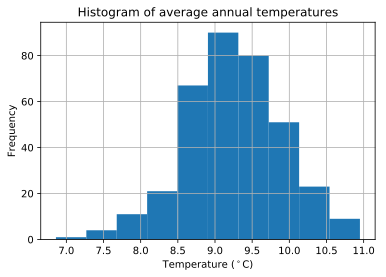

In [17]:
# Assume we have already imported the data as df

# Look at the year column of our data frame and plot histogram
df['YEAR'].hist()

# Label axes
plt.title('Histogram of average annual temperatures')
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Frequency')

plt.show()

3.Code to plot a scatter diagram of each year's February temperature plotted against that year's January temperature:

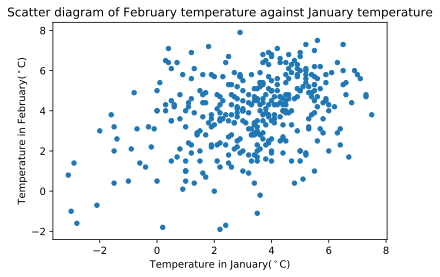

In [18]:
# Assume we have already imported the data as df

# Plot the data frame's February values against its January values
df.plot.scatter(x='JAN', y='FEB')

# Label axes
plt.title('Scatter diagram of February temperature against January temperature')
plt.xlabel(r'Temperature in January($^\circ$C)')
plt.ylabel(r'Temperature in February($^\circ$C)')

plt.show()

:+solution

## Key Points:
* We can plot a function quickly using `plot.plot(x, y)`.
* We can (and should) add a title and axes labels to our plots.
* The `bar()` function creates bar charts.
* The `hist()` function creates histograms.
* The `scatter()` function creates scatter diagrams.